RMSprop Theta: [[4.21009616]
 [2.76511339]]


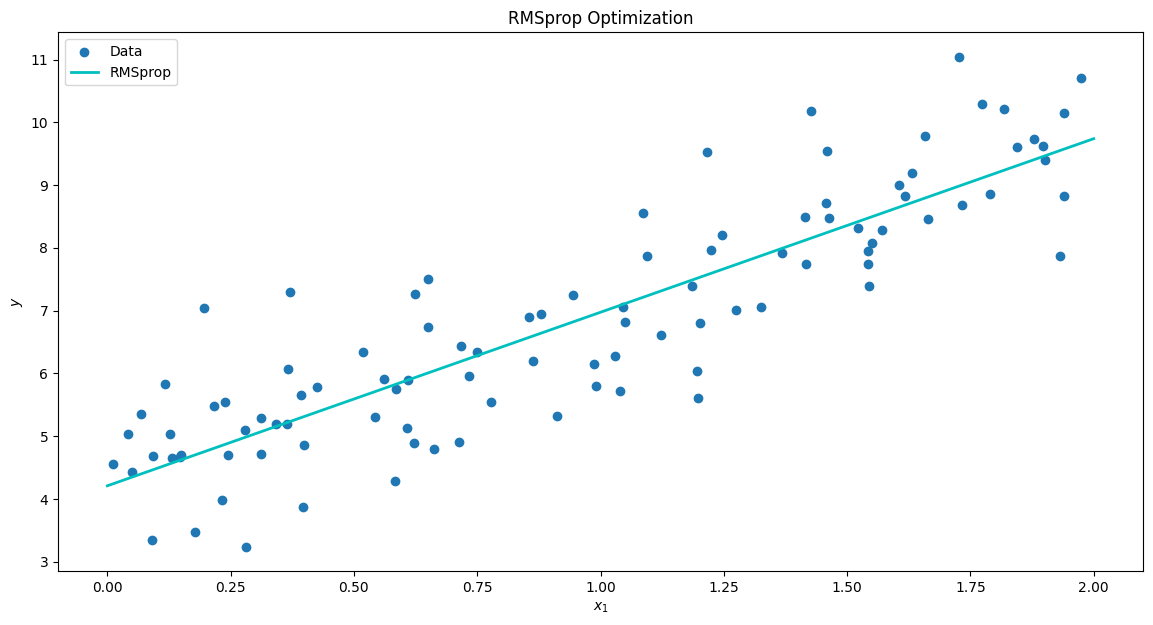

In [14]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X=2* np.random.rand(100, 1)
y=4+3*X+np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
# RMSprop
def rmsprop_optimization(X_input, y_input, learning_rate=0.01, beta=0.9, n_iterations=1000):
  m = len(y_input)
  theta = np.random.randn(X_input.shape[1], 1)  
  epsilon = 1e-8
  avg_sq_gradients = np.zeros_like(theta) 

  for iteration in range(n_iterations):
    predictions = X_input.dot(theta)
    error = predictions - y_input
    gradients = 2/m * X_input.T.dot(error) 

    avg_sq_gradients = beta * avg_sq_gradients + (1 - beta) * gradients**2 
    adjusted_gradients = gradients / (np.sqrt(avg_sq_gradients) + epsilon) 
    theta = theta - learning_rate * adjusted_gradients 

  return theta

theta_rmsprop = rmsprop_optimization(X_b, y) 
print("RMSprop Theta:", theta_rmsprop)

plt.figure()
plt.scatter(X, y, label="Data")
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict_rmsprop = X_new_b.dot(theta_rmsprop)
plt.plot(X_new, y_predict_rmsprop, "c-", linewidth=2, label="RMSprop")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.legend(loc="upper left")
plt.title("RMSprop Optimization")
plt.show()